In [1]:
# K-MEANS

/var/folders/lx/dg7jtm_s30dc8h3xp57l9g800000gn/T/ipykernel_13167/3782108737.py:25: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  clusterd = np.random.multivariate_normal([mu_x[j], mu_y[j]], [[sigma_x, covariance], [covariance, sigma_y]], N)


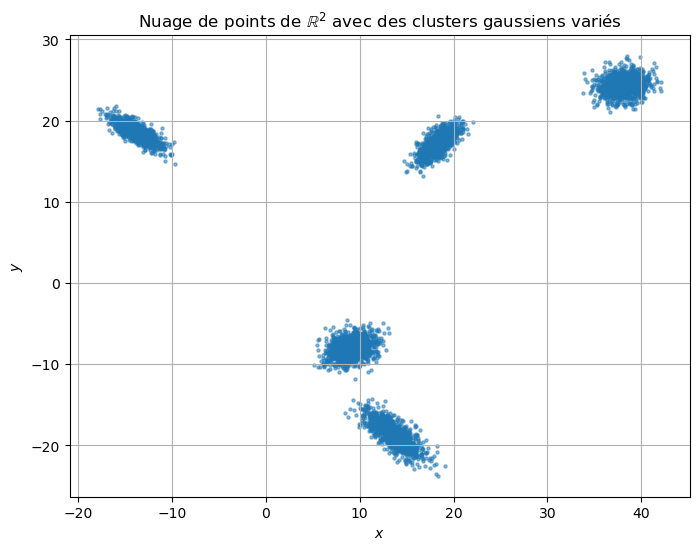

Meilleure VT obtenue: 16683.54290636127


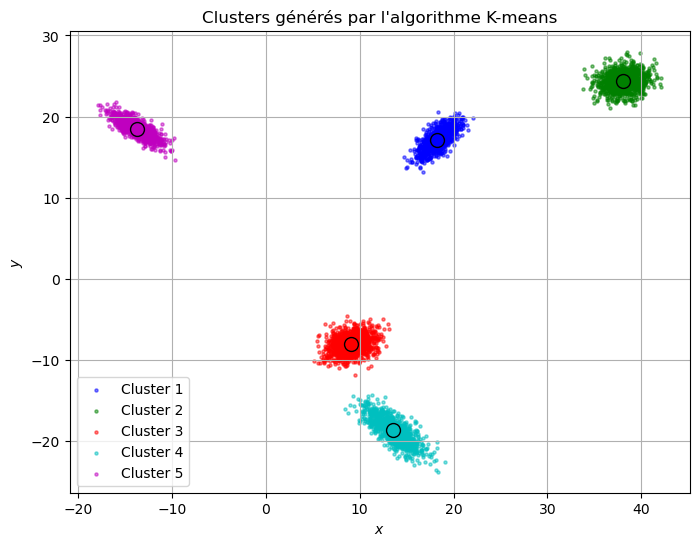

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Définition des paramètres
J = 5  # Nombre de clusters initiaux
N = 1000  # Nombre de points par clusters
mu_min, mu_max = -40, 40  # Plage pour les moyennes
sigma_min, sigma_max = 1, 2  # Plage pour les écarts-types

# Générer les moyennes aléatoirement
mu_x = np.random.uniform(mu_min, mu_max, J)
mu_y = np.random.uniform(mu_min, mu_max, J)

# Initialisation de l'ensemble P
P = np.empty((0, 2))

# Pour chaque cluster
for j in range(J):
    # Générer les paramètres de la gaussienne
    sigma_x = np.random.uniform(sigma_min, sigma_max)
    sigma_y = np.random.uniform(sigma_min, sigma_max)
    covariance = np.random.uniform(-0.8, 0.8) * sigma_x * sigma_y

    # Générer les points suivant une distribution gaussienne bidimensionnelle
    clusterd = np.random.multivariate_normal([mu_x[j], mu_y[j]], [[sigma_x, covariance], [covariance, sigma_y]], N)
    
    # Ajouter les points au nuage de points
    P = np.vstack((P, clusterd))

# Tracer le nuage de points
plt.figure(figsize=(8, 6))
plt.scatter(P[:, 0], P[:, 1], s=5, alpha=0.5)
plt.title('Nuage de points de $\\mathbb{R}^2$ avec des clusters gaussiens variés')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.show()

# Initialisation des centres de clusters
def init_(P, J):
    indices = np.random.choice(range(len(P)), J, replace=False)
    return P[indices]

# Implémentation de l'algorithme K-means avec calcul de la variation totale
def k_means(P, J, max_iter=300, tol=1e-4):
    means_init = init_(P, J)
    for _ in range(max_iter):
        # Étape 1 : Assigner chaque point au cluster le plus proche
        clusters = [[] for _ in range(J)]
        for point in P:
            distances = np.linalg.norm(means_init - point, axis=1)
            nearest_cluster = np.argmin(distances)
            clusters[nearest_cluster].append(point)
        
        # Étape 2 : Recalculer les centres des clusters
        new_means = []
        for i, cluster in enumerate(clusters):
            if cluster:
                new_means.append(np.mean(cluster, axis=0))
            else:
                new_means.append(means_init[i])  # Maintenir l'ancien centre si le cluster est vide
        new_means = np.array(new_means)
        
        # Vérifier la convergence
        if np.linalg.norm(means_init - new_means, axis=None) < tol:
            break
        
        means_init = new_means
    
    # Calculer de la variation totale W
    W = 0
    for i, cluster in enumerate(clusters):
        if cluster:
            W += np.sum(np.linalg.norm(np.array(cluster) - means_init[i], axis=1)**2)

    return clusters, means_init, W

# Exécuter K-means plusieurs fois pour minimiser la variation totale
num_runs = 20
best_W = np.inf
best_clusters = None
best_means = None

for _ in range(num_runs):
    clusters, means_init, W = k_means(P, J)
    if W < best_W:
        best_W = W
        best_clusters = clusters
        best_means = means_init

print(f"Meilleure VT obtenue: {best_W}")

# Tracer les meilleurs clusters
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm']
for i in range(J):
    cluster_points = np.array(best_clusters[i])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=5, alpha=0.5, color=colors[i], label=f'Cluster {i+1}')
    plt.scatter(best_means[i, 0], best_means[i, 1], s=100, color=colors[i], edgecolor='k')

plt.title('Clusters générés par l\'algorithme K-means')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
#MEAN SHIFT CLUSTERING

/var/folders/lx/dg7jtm_s30dc8h3xp57l9g800000gn/T/ipykernel_13167/3380311562.py:25: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  clusterd = np.random.multivariate_normal([mu_x[j], mu_y[j]], [[sigma_x, covariance], [covariance, sigma_y]], N)


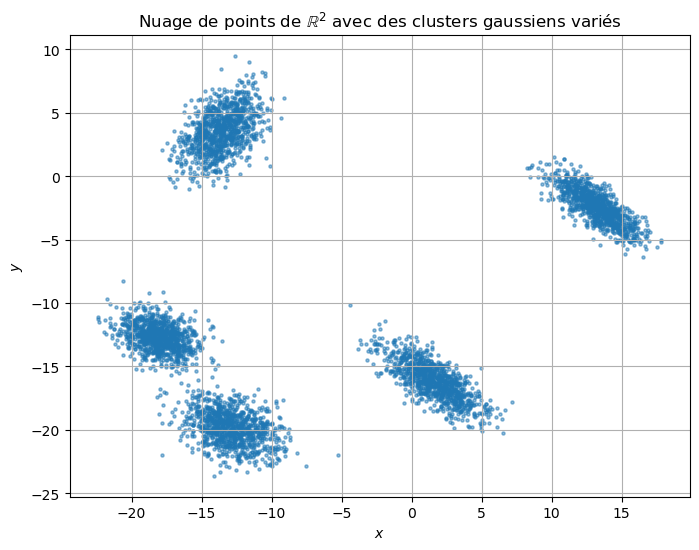

[[ -0.54682771 -15.79311497]
 [ -1.83060438 -15.25794766]
 [  4.15053248 -17.69765592]
 ...
 [ 15.62540092  -3.23451592]
 [ 11.37937524  -0.42521315]
 [ 12.15529612  -2.9585474 ]]


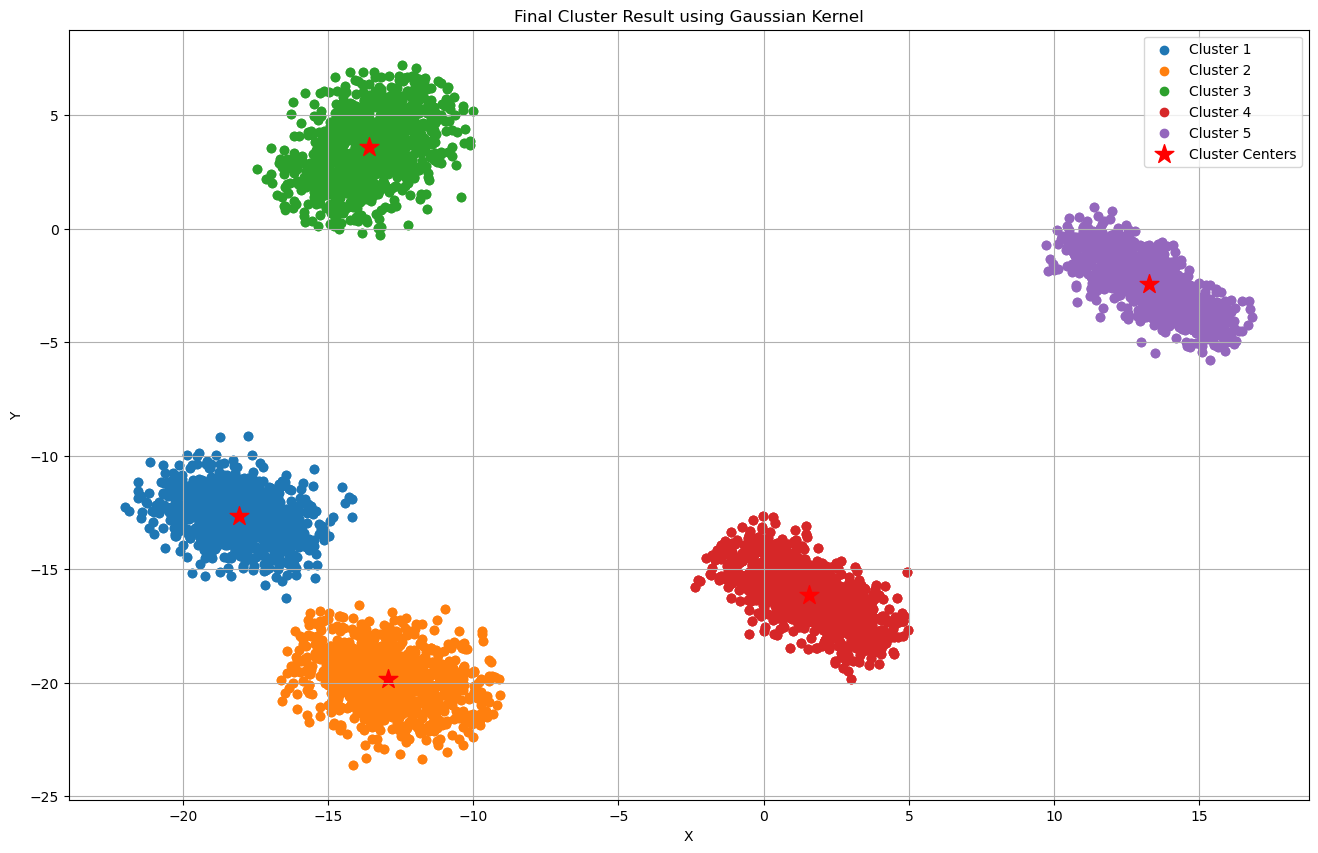

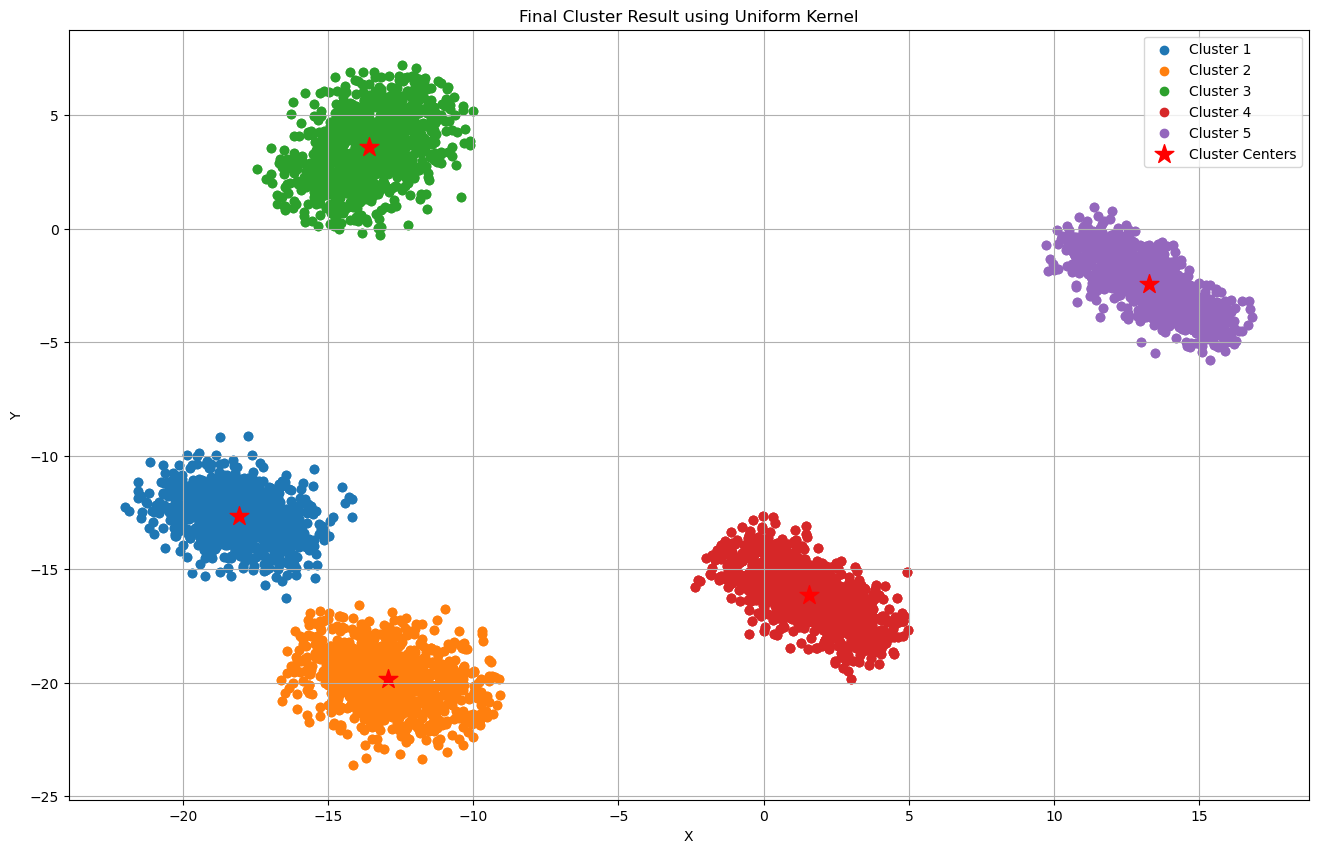

(array([[-18.07462213, -12.67206609],
        [-12.92576656, -19.82737948],
        [-13.60072964,   3.57096988],
        [  1.56029357, -16.14613866],
        [ 13.26074741,  -2.44361168]]),
 [array([[-18.77132974, -12.04593919],
         [-19.07855148, -13.62702539],
         [-19.85228568, -11.93175009],
         ...,
         [-18.87694677, -12.40756311],
         [-15.43865988, -15.38015132],
         [-16.44653484, -16.26444972]]),
  array([[-13.06139561, -21.40811098],
         [-11.23109048, -21.88333741],
         [-11.71363896, -18.3828718 ],
         ...,
         [-14.61269378, -18.28103786],
         [ -9.40028434, -19.08233246],
         [-13.06833544, -19.41694621]]),
  array([[-14.67771544,   0.73735256],
         [-10.94353954,   4.73047392],
         [-14.54001195,   5.19350668],
         ...,
         [-12.49604498,   3.44188049],
         [-11.4892926 ,   5.38050785],
         [-13.65872485,   1.31713256]]),
  array([[ -0.54682771, -15.79311497],
         [ -1.83060

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Définition des paramètres
J = 5 # nombre de clusters initiaux
N = 1000 # nombre de points par clusters
mu_min, mu_max = -20, 20  # Plage pour les moyennes
sigma_min, sigma_max = 1, 3  # Plage pour les écarts-types

# Générer les moyennes aléatoirement
mu_x = np.random.uniform(mu_min, mu_max, J)
mu_y = np.random.uniform(mu_min, mu_max, J)

# Initialisation de l'ensemble P
P = np.empty((0, 2))

# Pour chaque cluster
for j in range(J):
    # Générer les paramètres de la gaussienne
    sigma_x = np.random.uniform(sigma_min, sigma_max)
    sigma_y = np.random.uniform(sigma_min, sigma_max)
    covariance = np.random.uniform(-0.8, 0.8) * sigma_x * sigma_y

    # Générer les points suivant une distribution gaussienne bidimensionnelle
    clusterd = np.random.multivariate_normal([mu_x[j], mu_y[j]], [[sigma_x, covariance], [covariance, sigma_y]], N)
    
    # Ajouter les points au nuage de points
    P = np.vstack((P, clusterd))

# Tracer le nuage de points
plt.figure(figsize=(8, 6))
plt.scatter(P[:, 0], P[:, 1], s=5, alpha=0.5)
plt.title('Nuage de points de $\\mathbb{R}^2$ avec des clusters gaussiens variés')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.show()
print(P)

# Fonction pour trouver les points dans un rayon donné autour d'un centre
def points_in_radius(points, center, radius):
    distances = np.linalg.norm(points - center, axis=1)
    return points[distances <= radius], distances[distances <= radius]

# Fonction pour calculer le noyau gaussien
def gaussian_kernel(distance, bandwidth):
    return np.exp(-0.5 * (distance / bandwidth) ** 2)

# Fonction pour calculer le noyau uniforme
def uniform_kernel(distance, radius):
    return np.ones_like(distance)

# Fonction pour calculer le barycentre pondéré des points
def calculate_weighted_barycenter(points, distances, kernel, bandwidth):
    weights = kernel(distances, bandwidth)
    return np.sum(points * weights[:, np.newaxis], axis=0) / np.sum(weights)

# Fonction pour mettre à jour le centre de cluster
def update_cluster_center(points, center, radius, kernel, bandwidth):
    points_in_cluster, distances = points_in_radius(points, center, radius)
    if len(points_in_cluster) > 0:
        new_center = calculate_weighted_barycenter(points_in_cluster, distances, kernel, bandwidth)
    else:
        new_center = center
    return new_center, points_in_cluster

# Fonction pour effectuer le clustering dynamique
def cluster_dynamic(P, centers, r, kernel, bandwidth):
    while True:
        new_centers = []
        cluster_points = []
        for center in centers:
            new_center, new_points = update_cluster_center(P, center, r, kernel, bandwidth)
            new_centers.append(new_center)
            cluster_points.append(new_points)
        
        new_centers = np.array(new_centers)
        if np.allclose(centers, new_centers):
            break
        centers = new_centers

    return centers, cluster_points

# Fonction pour supprimer les clusters vides ou ceux contenant moins de points que le seuil minimal
def delete_clusters_below_threshold(centers, cluster_points, min_points):
    valid_clusters = [points for points in cluster_points if len(points) >= min_points]
    valid_centers = [centers[i] for i, points in enumerate(cluster_points) if len(points) >= min_points]
    return np.array(valid_centers), valid_clusters

# Fonction pour fusionner les clusters proches
def merge_clusters(centers, cluster_points, r):
    merged_centers = []
    merged_cluster_points = []
    used = np.zeros(len(centers), dtype=bool)
    
    for i, center in enumerate(centers):
        if used[i]:
            continue
        merged_center = center
        merged_points = cluster_points[i]
        for j in range(i + 1, len(centers)):
            if not used[j] and np.linalg.norm(centers[i] - centers[j]) < r:
                merged_points = np.vstack((merged_points, cluster_points[j]))
                used[j] = True
        merged_centers.append(merged_center)
        merged_cluster_points.append(merged_points)
    
    return np.array(merged_centers), merged_cluster_points

# Fonction pour assigner les points aux clusters les plus proches
def assign_points_to_clusters(points, centers):
    assigned_clusters = []
    for point in points:
        distances = np.linalg.norm(point - centers, axis=1)
        nearest_cluster_index = np.argmin(distances)
        assigned_clusters.append(nearest_cluster_index)
    return np.array(assigned_clusters)

# Fonction pour tracer les résultats du clustering
def plot_cluster_result(centers, cluster_points, kernel_name):
    plt.figure(figsize=(16, 10))
    for i, points in enumerate(cluster_points):
        plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i+1}')
    plt.scatter(centers[:, 0], centers[:, 1], color='red', marker='*', s=200, label='Cluster Centers')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Final Cluster Result using {kernel_name} Kernel')
    plt.legend()
    plt.grid(True)
    plt.show()

# Fonction principale de clustering
def dynamic_clustering(P, r, min_points, distribution='gaussian'):
    if distribution == 'gaussian':
        kernel = gaussian_kernel
        bandwidth = r
        kernel_name = 'Gaussian'
    elif distribution == 'uniform':
        kernel = uniform_kernel
        bandwidth = r
        kernel_name = 'Uniform'
    else:
        raise ValueError("Distribution must be 'gaussian' or 'uniform'.")

    # Définir les coordonnées x et y du nuage de points
    x = P[:, 0]
    y = P[:, 1]

    # Déterminer les limites du rectangle R
    x_min, x_max = np.min(x), np.max(x)
    y_min, y_max = np.min(y), np.max(y)

    # Créer la grille cartésienne
    grid_spacing = 10
    x_grid = np.arange(np.floor(x_min), np.ceil(x_max) + grid_spacing, grid_spacing)
    y_grid = np.arange(np.floor(y_min), np.ceil(y_max) + grid_spacing, grid_spacing)

    # Initialiser les centres de cluster aux noeuds de la grille
    centers = np.array([(x_, y_) for x_ in x_grid for y_ in y_grid])

    # Effectuer le clustering dynamique
    updated_centers, updated_cluster_points = cluster_dynamic(P, centers, r, kernel, bandwidth)

    # Supprimer les clusters vides ou contenant moins de points que le seuil minimal
    updated_centers, updated_cluster_points = delete_clusters_below_threshold(updated_centers, updated_cluster_points, min_points)

    # Fusionner les clusters proches (rayon de fusion ajusté)
    merged_centers, merged_cluster_points = merge_clusters(updated_centers, updated_cluster_points, r)

    # Affecter chaque point au cluster le plus proche
    assigned_clusters = assign_points_to_clusters(P, merged_centers)

    # Tracer le résultat final
    plot_cluster_result(merged_centers, merged_cluster_points, kernel_name)

    return merged_centers, merged_cluster_points, assigned_clusters

# Exemple d'utilisation
r = 4
min_points = 5

# Pour le noyau gaussien
dynamic_clustering(P, r, min_points, distribution='gaussian')

# Pour le noyau uniforme
dynamic_clustering(P, r, min_points, distribution='uniform')

In [ ]:
#ELBOW METHOD

/var/folders/lx/dg7jtm_s30dc8h3xp57l9g800000gn/T/ipykernel_13167/90216599.py:25: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  clusterd = np.random.multivariate_normal([mu_x[j], mu_y[j]], [[sigma_x, covariance], [covariance, sigma_y]], N)


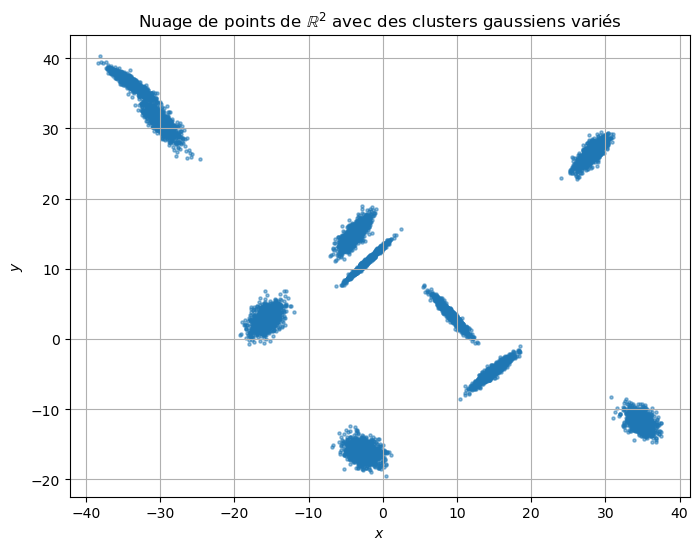

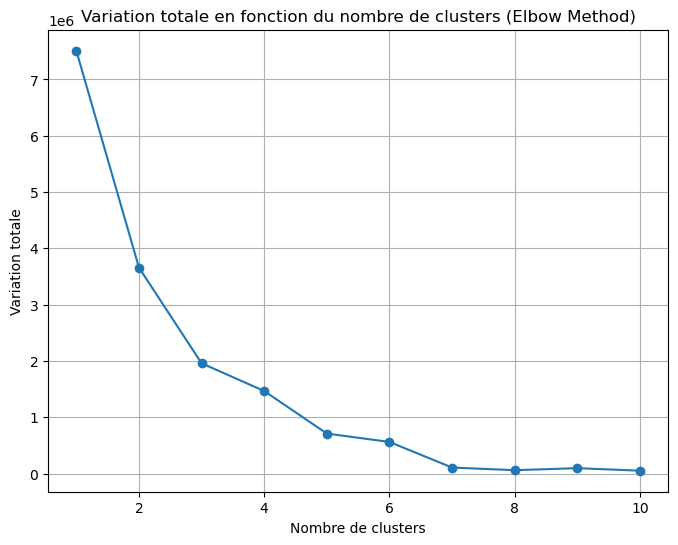

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Définition des paramètres
J_max = 10  # Nombre maximum de clusters à tester
N = 1000  # Nombre de points par clusters
mu_min, mu_max = -40, 40  # Plage pour les moyennes
sigma_min, sigma_max = 1, 2  # Plage pour les écarts-types

# Générer les moyennes aléatoirement
mu_x = np.random.uniform(mu_min, mu_max, J_max)
mu_y = np.random.uniform(mu_min, mu_max, J_max)

# Initialisation de l'ensemble P
P = np.empty((0, 2))

# Pour chaque cluster
for j in range(J_max):
    # Générer les paramètres de la gaussienne
    sigma_x = np.random.uniform(sigma_min, sigma_max)
    sigma_y = np.random.uniform(sigma_min, sigma_max)
    covariance = np.random.uniform(-0.8, 0.8) * sigma_x * sigma_y

    # Générer les points suivant une distribution gaussienne bidimensionnelle
    clusterd = np.random.multivariate_normal([mu_x[j], mu_y[j]], [[sigma_x, covariance], [covariance, sigma_y]], N)
    
    # Ajouter les points au nuage de points
    P = np.vstack((P, clusterd))

# Tracer le nuage de points
plt.figure(figsize=(8, 6))
plt.scatter(P[:, 0], P[:, 1], s=5, alpha=0.5)
plt.title('Nuage de points de $\\mathbb{R}^2$ avec des clusters gaussiens variés')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.show()

# Initialisation des centres de clusters
def init_(P, J):
    indices = np.random.choice(range(len(P)), J, replace=False)
    return P[indices]

# Implémentation de l'algorithme K-means avec calcul de la variation totale
def k_means(P, J, max_iter=300, tol=1e-4):
    means_init = init_(P, J)
    for _ in range(max_iter):
        # Étape 1 : Assigner chaque point au cluster le plus proche
        clusters = [[] for _ in range(J)]
        for point in P:
            distances = np.linalg.norm(means_init - point, axis=1)
            nearest_cluster = np.argmin(distances)
            clusters[nearest_cluster].append(point)
        
        # Étape 2 : Recalculer les centres des clusters
        new_means = []
        for i, cluster in enumerate(clusters):
            if cluster:
                new_means.append(np.mean(cluster, axis=0))
            else:
                new_means.append(means_init[i])  # Maintenir l'ancien centre si le cluster est vide
        new_means = np.array(new_means)
        
        # Vérifier la convergence
        if np.linalg.norm(means_init - new_means, axis=None) < tol:
            break
        
        means_init = new_means
    
    # Calculer de la variation totale W
    W = 0
    for i, cluster in enumerate(clusters):
        if cluster:
            W += np.sum(np.linalg.norm(np.array(cluster) - means_init[i], axis=1)**2)

    return clusters, means_init, W

# Calculer la variation totale pour différents nombres de clusters
W_values = []
K_range = range(1, J_max + 1)

for K in K_range:
    _, _, W = k_means(P, K)
    W_values.append(W)

# Tracer la variation totale en fonction du nombre de clusters
plt.figure(figsize=(8, 6))
plt.plot(K_range, W_values, marker='o')
plt.title('Variation totale en fonction du nombre de clusters (Elbow Method)')
plt.xlabel('Nombre de clusters')
plt.ylabel('Variation totale')
plt.grid(True)
plt.show()